#                                            Assignment No. 2
##               Supervised Learning: Predicting video games user review scores            
### Gonçalo Monteiro 202105821
### Claudia Batista 202108234

### required libraries

In [193]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as  plt
from pandas import read_table, read_csv
import seaborn as sb

os.chdir("C:\\Users\\gonca\\OneDrive\\Desktop\\dsproject")
data = pd.read_csv("video_games.csv", sep=',')


# 1. Checking the Data

In [194]:
#get the first rows of the table
data.head()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369,Grand Theft Auto V is a vast open world game s...
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997,"RPG and sequel to The Witcher 2 (2011), The Wi..."
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567,Skyrim reimagines and revolutionizes the open-...
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544,"Sequel to the acclaimed Portal (2007), Portal ..."
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297,"Waking up in a seemingly empty laboratory, the..."


In [195]:
#get the last rows of the tables
data.tail()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
5819,721,Freedom Force vs. The 3rd Reich,main_game,0,0,2005,5,False,"Role-playing (RPG), Strategy, Tactical","Irrational Games, Digital Jesters, Electronic ...",PC (Microsoft Windows),89.068175,great,11,Freedom is threatened yet again and only Minut...
5820,682,Europa Universalis II,main_game,0,0,2001,11,False,"Real Time Strategy (RTS), Simulator, Strategy","Strategy First, Paradox Interactive, MacPlay, ...","PC (Microsoft Windows), Mac",80.093551,great,11,Europa Universalis II invites you to a global ...
5821,628,Championship Manager: Season 03/04,main_game,0,0,2003,1,False,"Simulator, Sport","Eidos Interactive, Sports Interactive","PC (Microsoft Windows), Mac",70.855108,good,11,NaN
5822,317,SWAT 4: The Stetchkov Syndicate,expansion,0,0,2006,8,True,"Shooter, Simulator, Strategy, Tactical","Irrational Games, Vivendi Universal, Sierra En...",PC (Microsoft Windows),70.350237,good,11,The Stetchkov Syndicate expansion adds seven n...
5823,140,Star Wars: Galactic Battlegrounds - Clone Camp...,expansion,0,0,2002,5,True,"Real Time Strategy (RTS), Simulator, Strategy","LucasArts, Ensemble Studios, Square Electronic...","PC (Microsoft Windows), Mac",80.590123,great,11,Expand the battlefield with the Clone Campaign...


In [196]:
#name of the columns
data.columns

Index(['id', 'name', 'category', 'n_dlcs', 'n_expansions', 'year', 'follows',
       'in_franchise', 'genres', 'companies', 'platforms', 'user_score',
       'user_rating', 'n_user_reviews', 'summary'],
      dtype='object')

In [197]:
# quick description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5824 non-null   int64  
 1   name            5824 non-null   object 
 2   category        5824 non-null   object 
 3   n_dlcs          5824 non-null   int64  
 4   n_expansions    5824 non-null   int64  
 5   year            5824 non-null   int64  
 6   follows         5824 non-null   int64  
 7   in_franchise    5824 non-null   bool   
 8   genres          5803 non-null   object 
 9   companies       5781 non-null   object 
 10  platforms       5824 non-null   object 
 11  user_score      5824 non-null   float64
 12  user_rating     5824 non-null   object 
 13  n_user_reviews  5824 non-null   int64  
 14  summary         5816 non-null   object 
dtypes: bool(1), float64(1), int64(6), object(7)
memory usage: 642.8+ KB


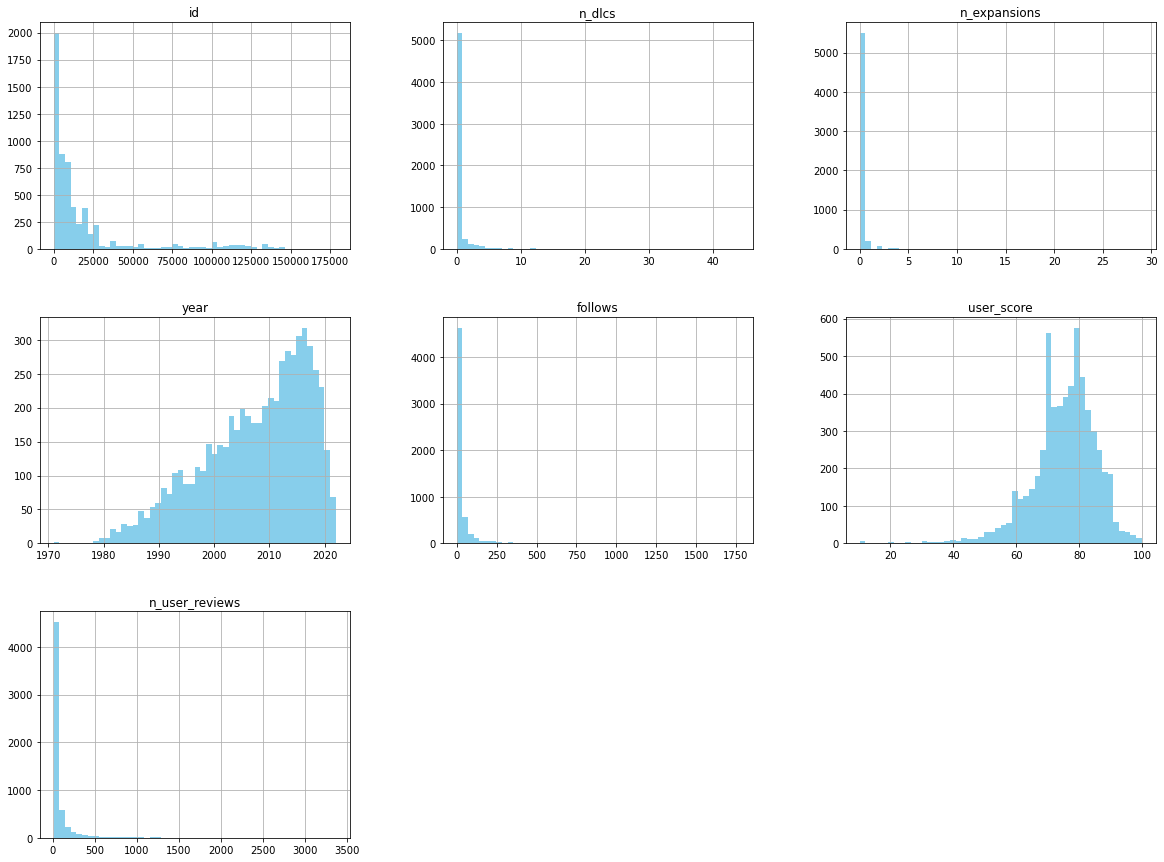

In [198]:
# histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15), color='skyblue')
plt.show()

In [199]:
#looking for missing data
data = pd.read_csv('video_games.csv', na_values=['NA']) 

In [200]:
#sum of how many empty cells per column before removing them
data.isnull().sum()

id                 0
name               0
category           0
n_dlcs             0
n_expansions       0
year               0
follows            0
in_franchise       0
genres            21
companies         43
platforms          0
user_score         0
user_rating        0
n_user_reviews     0
summary            8
dtype: int64

In [201]:
#dataset description
data.describe()

,id,n_dlcs,n_expansions,year,follows,user_score,n_user_reviews
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000
mean,18508.000515,0.450721,0.120707,2007.293784,35.428056,75.115510,86.186470
std,30546.018723,2.150920,0.811236,9.342881,85.026280,10.197815,194.781917
min,1.000000,0.000000,0.000000,1971.000000,0.000000,10.266748,11.000000
25%,2271.750000,0.000000,0.000000,2001.000000,5.000000,69.937370,16.000000
50%,7258.000000,0.000000,0.000000,2009.000000,11.000000,76.258903,28.000000
75%,18581.250000,0.000000,0.000000,2015.000000,28.000000,81.695739,67.000000
max,178351.000000,44.000000,29.000000,2022.000000,1766.000000,99.738172,3369.000000


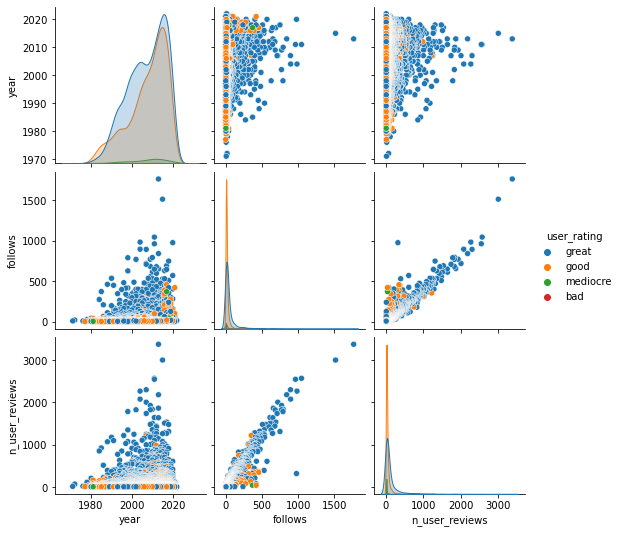

In [202]:

#Scatterplot matrix for important features matrix

sb.pairplot(data.loc[:,['year','follows','n_user_reviews','user_rating']], vars=['year', 'follows','n_user_reviews'], hue='user_rating')    

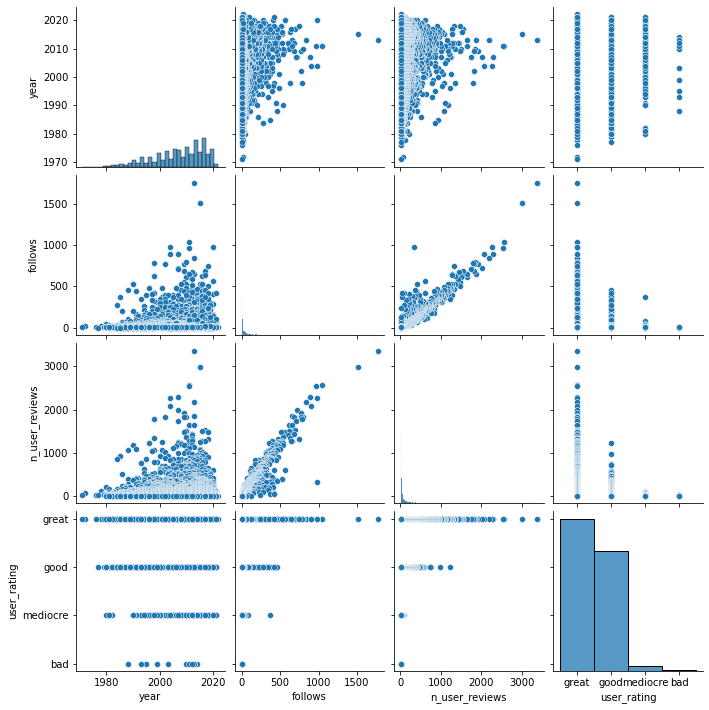

In [203]:
data visualizer
data_drop=data.dropna()
sb.pairplot(data_drop.loc[:,['year','follows','n_user_reviews', 'user_rating']], vars=['year','follows','n_user_reviews','user_rating'])

# 2.Tidying the Data

## Drop columns

In [204]:
#select features
#drop 'name', 'id' and 'summary' which don't affect user_rating
data = data.drop(['name'], axis=1)
data = data.drop(['summary'], axis=1)
data = data.drop(['id'], axis=1)
#retirar o user_score porque não sei
data = data.drop(['user_score'], axis=1)
data.head()

,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_rating,n_user_reviews
0,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",great,3369
1,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",great,2997
2,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",great,2567
3,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",great,2544
4,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",great,2297


## Encoding Data

In [205]:
#encode category, in_franchise, genres, companies and platforms
from sklearn.preprocessing import LabelEncoder
le_category = LabelEncoder()
le_in_franchise = LabelEncoder()
le_genres = LabelEncoder()
le_companies = LabelEncoder()
le_platforms = LabelEncoder()

data['category1'] = le_category.fit_transform(data['category'])
data['in_franchise1'] = le_category.fit_transform(data['in_franchise'])
data['genres1'] = le_category.fit_transform(data['genres'])
data['companies1'] = le_category.fit_transform(data['companies'])
data['platorms1'] = le_category.fit_transform(data['platforms'])

#retirar colunas originais
data = data.drop(['category'], axis=1)
data = data.drop(['in_franchise'], axis=1)
data = data.drop(['companies'], axis=1)
data = data.drop(['genres'], axis=1)
data = data.drop(['platforms'], axis=1)

#encode user_rating
# creating a dictionary
userrating_dict ={'mediocre':1, 'bad':2, 'good':3,'great':4}
# mapping values in column from dictionary
data['user_rating_encode']= data.user_rating.map(userrating_dict)
data=data.drop(['user_rating'], axis = 1)

data.head(10)

,n_dlcs,n_expansions,year,follows,n_user_reviews,category1,in_franchise1,genres1,companies1,platorms1,user_rating_encode
0,0,0,2013,1766,3369,6,1,517,3001,735,4
1,4,2,2015,1516,2997,6,1,428,4150,782,4
2,3,0,2011,1046,2567,6,0,428,492,671,4
3,3,0,2011,963,2544,6,1,550,4065,231,4
4,0,0,2007,894,2297,6,1,549,4063,232,4
5,0,0,2004,984,2265,6,1,585,2989,589,4
6,0,1,2013,842,2179,6,1,517,2378,1123,4
7,0,0,2004,896,2076,6,1,516,3251,257,4
8,1,0,2007,719,2004,6,0,603,1008,714,4
9,2,0,2009,772,1927,6,1,149,3997,714,4


### feature importance

In [206]:
import pandas as pd
importance = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree.feature_importances_,3)})
importance.sort_values('importance', ascending=False, inplace=True)
importance[importance.importance>0]

,feature,importance
4,n_user_reviews,0.216
8,companies1,0.181
7,genres1,0.140
9,platorms1,0.134
2,year,0.129
3,follows,0.117
5,category1,0.045
0,n_dlcs,0.018
6,in_franchise1,0.016
1,n_expansions,0.004


# 3. Train and Test

## Create Train and Test sets

In [207]:
#create a train and test dataset
from sklearn.model_selection import train_test_split
SEED=123
X = data.iloc[:,0:10]
y = data.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = SEED)

## Decision Tree

0.6171673819742489
max_depth: 9
score: 0.6240343347639485


(array([ 1.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  2.,  7.]),
 array([0.5193133 , 0.52978541, 0.54025751, 0.55072961, 0.56120172,
        0.57167382, 0.58214592, 0.59261803, 0.60309013, 0.61356223,
        0.62403433]),
 <BarContainer object of 10 artists>)

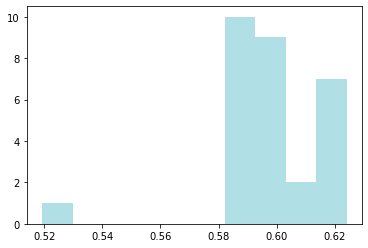

In [208]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini", max_depth=2)
dtree.fit(X_train, y_train)

#calculate max_depth that gives us the best score 
value = dtree.score(X_test, y_test)
print(value)
n=2
listi = []
listvalue1 = []
for i in range(1,30):
    tree = DecisionTreeClassifier(criterion="gini",max_depth=i)
    tree.fit(X_train, y_train)

    value1 = tree.score(X_test, y_test)
    listi.append(i)
    listvalue1.append(value1)
    if value1 > value:
        n= i
        value = value1

print('max_depth:',n)
print('score:', value)

plt.hist(listvalue1, color="powderblue")


In [209]:
dtreefinal = DecisionTreeClassifier(criterion="gini", max_depth=9)
dtreefinal.fit(X_train, y_train)
value=dtreefinal.score(X_test, y_test)
print(value)

0.6223175965665236


In [210]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         3
           3       0.49      0.45      0.47       467
           4       0.64      0.70      0.67       671

    accuracy                           0.58      1165
   macro avg       0.28      0.29      0.28      1165
weighted avg       0.57      0.58      0.57      1165



C:\Users\gonca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gonca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gonca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


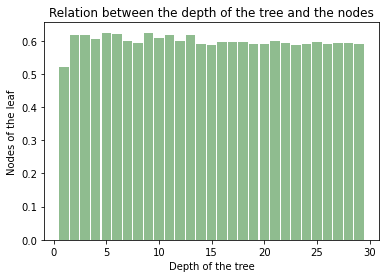

In [211]:
plt.bar(listi,listvalue1,color="darkseagreen",width=0.9)
plt.xlabel("Depth of the tree")
plt.ylabel("Nodes of the leaf")
plt.title("Relation between the depth of the tree and the nodes")
plt.show()

0.6094420600858369
max_depth: 2
score: 0.6094420600858369


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  6., 10., 10.]),
 array([0.5167382 , 0.52626609, 0.53579399, 0.54532189, 0.55484979,
        0.56437768, 0.57390558, 0.58343348, 0.59296137, 0.60248927,
        0.61201717]),
 <BarContainer object of 10 artists>)

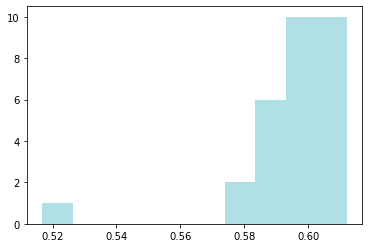

In [212]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dtree1.fit(X_train, y_train)

#calculate max_depth that gives us the best score 
value2 = dtree1.score(X_test, y_test)
print(value2)
n=2
listi1 = []
listvalue11 = []
for i in range(1,30):
    tree1 = DecisionTreeClassifier(criterion="entropy",max_depth=i)
    tree1.fit(X_train, y_train)

    value1 = tree1.score(X_test, y_test)
    listi1.append(i)
    listvalue11.append(value1)
    if value1 > value:
        n= i
        value2 = value1

print('max_depth:',n)
print('score:', value2)

plt.hist(listvalue11, color="powderblue")


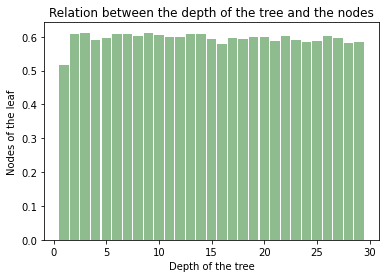

In [213]:
plt.bar(listi1,listvalue11,color="darkseagreen",width=0.9)
plt.xlabel("Depth of the tree")
plt.ylabel("Nodes of the leaf")
plt.title("Relation between the depth of the tree and the nodes")
plt.show()

# KNN

In [214]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 79, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

y_predk = classifier.predict(X_test)


In [215]:
# prediction of the training set
y_predk = classifier.predict(X_test)
y_pred_train= classifier.predict(X_train)

In [216]:
#ciclo for para saber qual o melhor valor de k
from sklearn.metrics import confusion_matrix,accuracy_score
#cm = confusion_matrix(y_test, y_pred)
x1=0
x2=0
for i in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean', p=2)
    classifier.fit(X_train, y_train)
    y_predk = classifier.predict(X_test)
    ac = accuracy_score(y_test,y_predk)
    if ac > x1:
        x1 = ac
        x2 = i
print(x1)
print(x2)

0.6068669527896996
89


In [217]:
classifier = KNeighborsClassifier(n_neighbors = 79, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)
y_predk = classifier.predict(X_test)
ac = accuracy_score(y_test,y_predk)
ac

0.5845493562231759

In [218]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predk))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         3
           3       0.49      0.45      0.47       467
           4       0.64      0.70      0.67       671

    accuracy                           0.58      1165
   macro avg       0.28      0.29      0.28      1165
weighted avg       0.57      0.58      0.57      1165



C:\Users\gonca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gonca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gonca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## results

In [219]:
print("score for knn:", ac)
print("score for decision_tree:", value)

score for knn: 0.5845493562231759
score for decision_tree: 0.6223175965665236
